In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [3]:
X.shape

(500, 64)

In [4]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d = tsne.fit_transform(X)

In [7]:
X_2d

array([[ 2.52458439e+01, -2.67664146e+01],
       [ 2.28901577e+00,  1.95678921e+01],
       [-3.32616973e+00,  1.39484625e+01],
       [-7.26528502e+00, -2.10296688e+01],
       [ 1.36005802e+01,  2.44120731e+01],
       [-4.22272158e+00, -1.55656071e+01],
       [ 2.44161987e+01,  5.47982359e+00],
       [-2.48847866e+01,  1.41076345e+01],
       [ 2.95365238e+00,  1.88698840e+00],
       [ 4.07687455e-01, -1.06342258e+01],
       [ 2.57762623e+01, -2.96625595e+01],
       [ 1.61965740e+00,  2.91853580e+01],
       [-1.57831402e+01,  7.35889864e+00],
       [-1.25017681e+01, -2.30286694e+01],
       [ 1.48342066e+01,  2.20322094e+01],
       [-2.09151230e+01, -7.33892775e+00],
       [ 2.26353302e+01,  3.13018727e+00],
       [-2.69720592e+01,  1.77056293e+01],
       [-1.08743489e+00,  6.95181990e+00],
       [-1.41340101e+00, -1.75598335e+01],
       [ 2.47729454e+01, -2.21613674e+01],
       [ 1.13574898e+00,  2.53565826e+01],
       [-1.33545504e+01,  6.22781134e+00],
       [-1.

In [8]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [9]:
mydata['digits']=y

In [10]:
mydata

,X,Y,digits
0,25.245844,-26.766415,0
1,2.289016,19.567892,1
2,-3.326170,13.948462,2
3,-7.265285,-21.029669,3
4,13.600580,24.412073,4
...,...,...,...
495,-17.382631,-8.286452,5
496,10.704874,23.691715,4
497,10.658031,22.269207,4
498,-31.458773,7.027144,7


In [11]:
mydata['digits'].value_counts()

3    53
1    52
6    51
0    51
7    50
5    50
2    50
4    49
9    48
8    46
Name: digits, dtype: int64

In [12]:
import seaborn as sns
%matplotlib inline

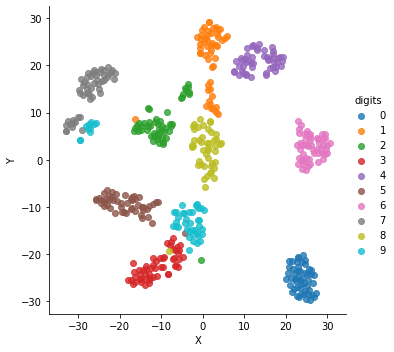

In [13]:
sns.lmplot('X','Y',hue='digits',data=mydata,fit_reg=False)

In [14]:
mydata

,X,Y,digits
0,25.245844,-26.766415,0
1,2.289016,19.567892,1
2,-3.326170,13.948462,2
3,-7.265285,-21.029669,3
4,13.600580,24.412073,4
...,...,...,...
495,-17.382631,-8.286452,5
496,10.704874,23.691715,4
497,10.658031,22.269207,4
498,-31.458773,7.027144,7


In [15]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline


In [16]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(mydata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = kmeans.labels_  #gives cluster numbers
mydata["cluster"]=labels

In [18]:
mydata

,X,Y,digits,cluster
0,25.245844,-26.766415,0,5
1,2.289016,19.567892,1,9
2,-3.326170,13.948462,2,9
3,-7.265285,-21.029669,3,3
4,13.600580,24.412073,4,4
...,...,...,...,...
495,-17.382631,-8.286452,5,8
496,10.704874,23.691715,4,4
497,10.658031,22.269207,4,4
498,-31.458773,7.027144,7,0


In [19]:
mydata['cluster'].value_counts()

0    60
3    54
5    51
2    51
1    51
9    50
8    49
4    49
7    44
6    41
Name: cluster, dtype: int64

In [20]:
del mydata['cluster']


In [21]:
mydata

,X,Y,digits
0,25.245844,-26.766415,0
1,2.289016,19.567892,1
2,-3.326170,13.948462,2
3,-7.265285,-21.029669,3
4,13.600580,24.412073,4
...,...,...,...
495,-17.382631,-8.286452,5
496,10.704874,23.691715,4
497,10.658031,22.269207,4
498,-31.458773,7.027144,7


In [22]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [23]:
from sklearn.model_selection import train_test_split
mydata.dropna(axis=0,inplace=True)  #we dont have nan in the data so this step is not nessesary
mydata_train, mydata_test = train_test_split(mydata, test_size = 0.2,random_state=2)

In [24]:
x_train=mydata_train.drop(['digits'],1)
y_train=mydata_train["digits"]
x_test=mydata_test.drop(["digits"],1)
y_test=mydata_test["digits"]

<Figure size 432x288 with 0 Axes>

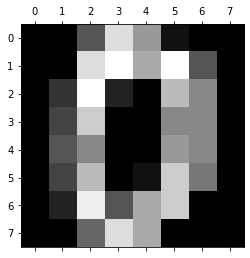

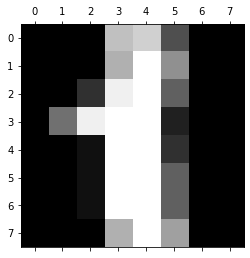

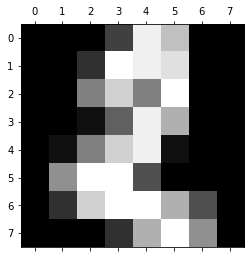

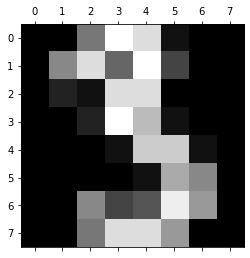

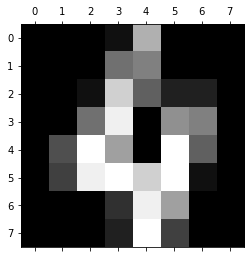

In [25]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])

In [31]:
help(dir())

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [29]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [32]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
model = LogisticRegression()

In [35]:
model.fit(x_train, y_train)

C:\Users\MORA.SHIVARAMAKRISHN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MORA.SHIVARAMAKRISHN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
roc_auc_score(y_test,model.predict(x_test))  #multi class doesnt support roc auc

ValueError: multiclass format is not supported

In [37]:
model.score(x_test, y_test)  #accuracy

0.84

In [39]:
y_predicted = model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  4,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 11,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  4,  0,  5]], dtype=int64)

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted,average='weighted')

0.8334164214885039

Text(69.0, 0.5, 'Truth')

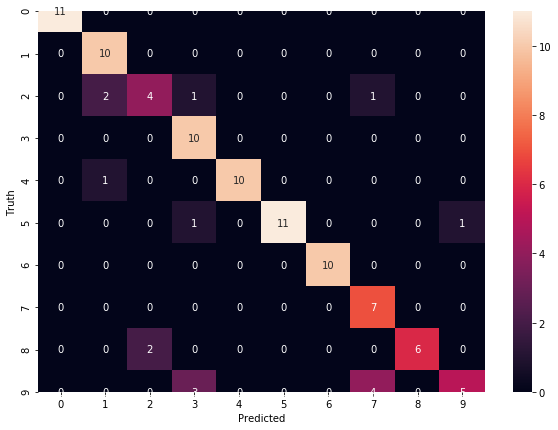

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')